In [84]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

In [85]:
#Setting display columns
pd.set_option('display.max_columns', None)

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#Read dataset
df = pd.read_json('/content/drive/MyDrive/transactions.json', lines=True)

In [88]:
#show dataframe
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [89]:
#Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  object 
 10  posConditionCode          641914 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [90]:
#returns the number of unique values for each column
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              450690
transactionDateTime         635472
transactionAmount            62735
merchantName                  2493
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1826
dateOfLastAddressChange       2186
cardCVV                        899
enteredCVV                     980
cardLast4Digits               5134
transactionType                  4
isFraud                          2
echoBuffer                       1
currentBalance              406990
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInM

In [91]:
#get the count for transactionType by ignoring None and Nan values
df.groupby(['transactionType'])['transactionType'].count()

transactionType
                           589
ADDRESS_VERIFICATION     16478
PURCHASE                608685
REVERSAL                 16162
Name: transactionType, dtype: int64

# **Data** **Preprocessing**

In [92]:
# converting in datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [93]:
#Return top 5 rows of a data frame
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [94]:
#Checking data types
df.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
isFraud                               bool
echoBuffer                          object
currentBalance                     float64
merchantCity                        object
merchantSta

In [95]:
#find duplicate rows
Dup_Rows = df[df.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
 Empty DataFrame
Columns: [accountNumber, customerId, creditLimit, availableMoney, transactionDateTime, transactionAmount, merchantName, acqCountry, merchantCountryCode, posEntryMode, posConditionCode, merchantCategoryCode, currentExpDate, accountOpenDate, dateOfLastAddressChange, cardCVV, enteredCVV, cardLast4Digits, transactionType, isFraud, echoBuffer, currentBalance, merchantCity, merchantState, merchantZip, cardPresent, posOnPremises, recurringAuthInd, expirationDateKeyInMatch]
Index: []


In [96]:
#check similarity between accountNumber and customerId
df['accountNumber'].equals(df['customerId'])

True

In [97]:
#check similarity between cardCVV and enteredCVV
df['cardCVV'].equals(df['enteredCVV'])

False

In [98]:
#create column matchCVV
df['matchCVV']= df['cardCVV']==(df['enteredCVV'])

In [99]:
#drop column cardCVV and entered CVV
df = df.drop(columns=['cardCVV','enteredCVV'])
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,matchCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,9184,PURCHASE,True,,0.00,,,,False,,,False,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,9184,PURCHASE,False,,111.33,,,,False,,,False,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,9184,PURCHASE,False,,136.08,,,,False,,,False,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,9184,PURCHASE,True,,323.48,,,,False,,,False,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False,True


# **Missing** **Value** **Handling**

In [100]:
#Replacing blank values (white space) with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [101]:
#Checking missing value
df.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInMatch         0
matchCVV                         0
dtype: int64

In [102]:
#check columns with missing value > 70%
nullvalue = df.isnull().sum()
nullvalue.where((nullvalue/641914) > 0.7).dropna().astype(int)

echoBuffer          641914
merchantCity        641914
merchantState       641914
merchantZip         641914
posOnPremises       641914
recurringAuthInd    641914
dtype: int64

In [103]:
#drop columns with missing value > 70%
df = df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'])

In [104]:
#Return top 5 rows of a data frame after drop some columns
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,9184,PURCHASE,True,0.00,False,False,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,9184,PURCHASE,False,111.33,False,False,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,9184,PURCHASE,False,136.08,False,False,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,9184,PURCHASE,True,323.48,False,False,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,9184,ADDRESS_VERIFICATION,False,550.82,False,False,True


In [105]:
#Fill missing values with mode for data training
na_data = ['acqCountry', 'merchantCountryCode', 'posEntryMode','posConditionCode','transactionType']

for i in na_data:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [106]:
#Checking missing value
df.isna().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
matchCVV                    0
dtype: int64

# **Outliers** **Handling**

In [107]:
#show statistics summary
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,9998.000000,47496.500000


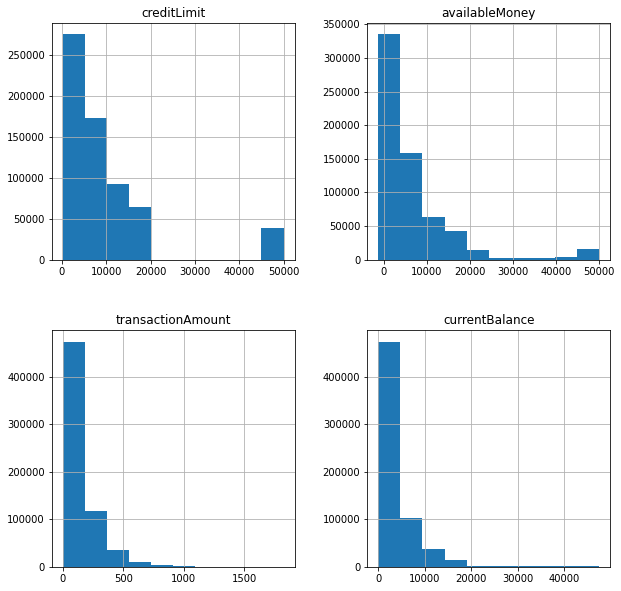

In [108]:
#visualitation Numerical Valued importance column 
df.hist(column=["creditLimit", "availableMoney", "transactionAmount", "currentBalance"] , figsize = (10, 10))
plt.show()

In [109]:
Q1 = df['creditLimit'].quantile(0.25)
Q3 = df['creditLimit'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [110]:
df = df[(df['creditLimit'] > lower_bound) & (df['creditLimit'] < upper_bound)]
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,9184,PURCHASE,True,0.00,False,False,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,9184,PURCHASE,False,111.33,False,False,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,9184,PURCHASE,False,136.08,False,False,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,9184,PURCHASE,True,323.48,False,False,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,9184,ADDRESS_VERIFICATION,False,550.82,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,186770399,186770399,7500,2574.02,2016-12-04 12:29:21,5.37,Apple iTunes,US,US,05,08,mobileapps,2030-01-01,2015-11-04,2016-06-03,5432,PURCHASE,False,4925.98,False,False,True
641910,186770399,186770399,7500,2568.65,2016-12-09 04:20:35,223.70,Blue Mountain eCards,US,US,09,01,online_gifts,2026-05-01,2015-11-04,2016-06-03,5432,PURCHASE,False,4931.35,False,False,True
641911,186770399,186770399,7500,2344.95,2016-12-16 07:58:23,138.42,Fresh Flowers,US,US,02,01,online_gifts,2019-10-01,2015-11-04,2016-06-03,5432,PURCHASE,False,5155.05,False,False,True
641912,186770399,186770399,7500,2206.53,2016-12-19 02:30:35,16.31,abc.com,US,US,09,08,online_subscriptions,2029-11-01,2015-11-04,2016-06-03,5432,PURCHASE,False,5293.47,False,False,True


In [111]:
df.to_csv('datafinal.csv')
df.to_csv('/content/drive/MyDrive/transactions.datafinalrevisi2.csv', index=False)

# **Correlation**

In [112]:
#Encode datatype use LabelEncoder
le = LabelEncoder()
var = ['merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch','isFraud','matchCVV']
for i in var:
    df[i] = le.fit_transform(df[i])

In [113]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,1066,3,3,1,0,17,2020-04-01,2014-08-03,2014-08-03,9184,1,1,0.00,0,0,1
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,2086,3,3,2,0,17,2023-06-01,2014-08-03,2014-08-03,9184,1,0,111.33,0,0,1
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,1066,3,3,1,0,17,2027-12-01,2014-08-03,2014-08-03,9184,1,0,136.08,0,0,1
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,1066,3,3,0,0,17,2029-09-01,2014-08-03,2014-08-03,9184,1,1,323.48,0,0,1
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,1066,3,3,0,0,17,2024-10-01,2014-08-03,2014-08-03,9184,0,0,550.82,0,0,1


In [114]:
#drop irrelevant columns
df = df.drop(columns=['accountNumber','customerId','transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'])

In [117]:
#get correlation to isFraud
corr_df=df.corr()
corr=corr_df.loc['isFraud'].reset_index()
corr.drop([5],inplace=True)
corr.reset_index(drop=True,inplace=True)
corr.rename(columns={'index':'column_name'},inplace=True)
corr

,column_name,isFraud
0,creditLimit,0.006689
1,availableMoney,0.001722
2,transactionAmount,0.087538
3,merchantName,0.003560
4,acqCountry,-0.005023
5,posEntryMode,0.023409
6,posConditionCode,-0.006295
7,merchantCategoryCode,0.008301
8,cardLast4Digits,-0.005526
9,transactionType,0.010939


In [118]:
#sort correlation coefficients
corr['isFraud']=corr['isFraud'].abs()
sig_var=corr.sort_values(by='isFraud',ascending=False).reset_index(drop=True)
sig_var

,column_name,isFraud
0,isFraud,1.000000
1,transactionAmount,0.087538
2,posEntryMode,0.023409
3,cardPresent,0.012343
4,matchCVV,0.011296
5,transactionType,0.010939
6,currentBalance,0.008520
7,merchantCategoryCode,0.008301
8,creditLimit,0.006689
9,posConditionCode,0.006295


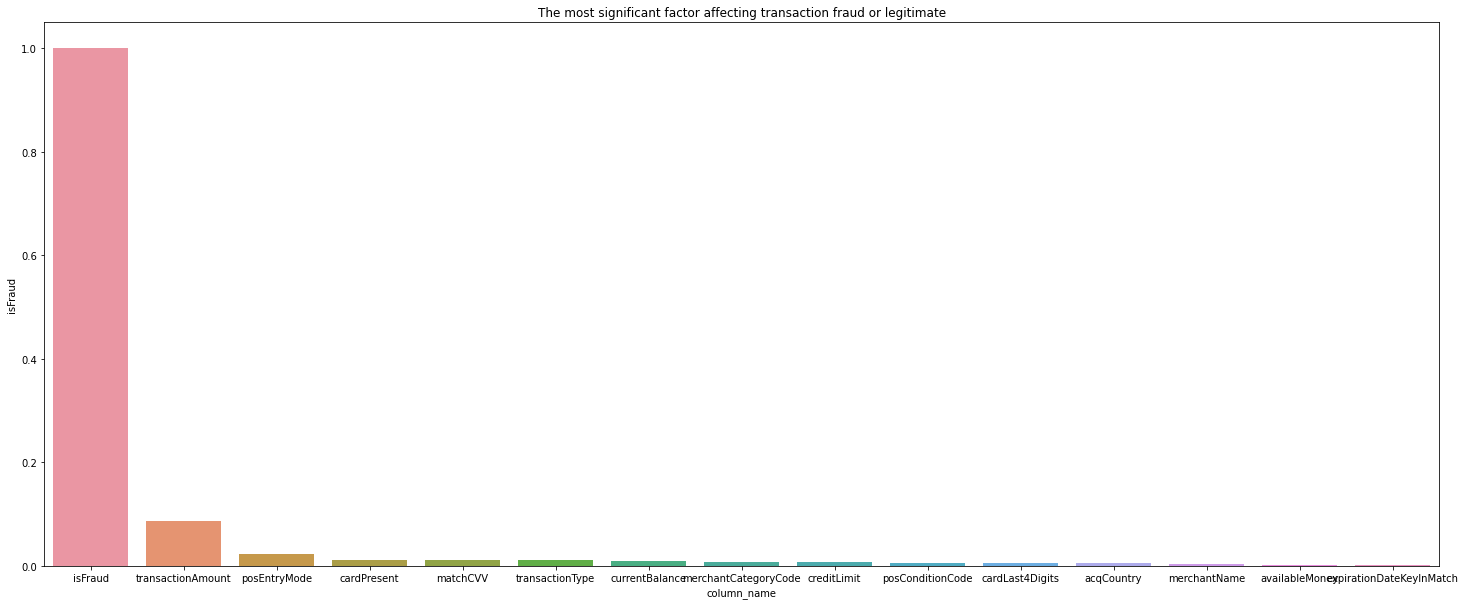

In [119]:
# show significant variabel
plt.figure(figsize=(25,10))
plt.title('The most significant factor affecting transaction fraud or legitimate')
ax = sns.barplot(x="column_name", y="isFraud", data=sig_var)

## **Modelling**



In [120]:
#split dataset in features and target variable
y = df['isFraud']
x = df.drop(columns=['isFraud'])

In [121]:
print('shape of X:',x.shape)
print('shape of y:',y.shape[0])

shape of X: (603875, 15)
shape of y: 603875


In [122]:
# split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Logistic Regression**

In [123]:
#initialize logreg model
logreg = LogisticRegression()

In [124]:
#fit the model with data
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [125]:
#predictt model
y_pred = logreg.predict(x_test)

In [126]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
97583,0,0
264565,0,0
316349,0,0
228447,0,0
516229,0,0
...,...,...
280440,0,0
262605,0,0
580460,0,0
460908,0,0


In [127]:
# Evaluate model using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118661,      4],
       [  2110,      0]])

Text(0.5, 257.44, 'Predicted label')

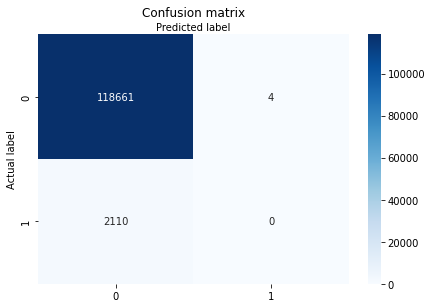

In [128]:
# Plot Confusion Matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [129]:
# Evaluating on Test Set
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9824963775615815


# **Random** **Forest**

In [130]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 200, random_state=42)

In [131]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [132]:
#predict model
y_pred_RF=clf.predict(x_test)

In [133]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_RF)
cnf_matrix

array([[118663,      2],
       [  2051,     59]])

Text(0.5, 257.44, 'Predicted label')

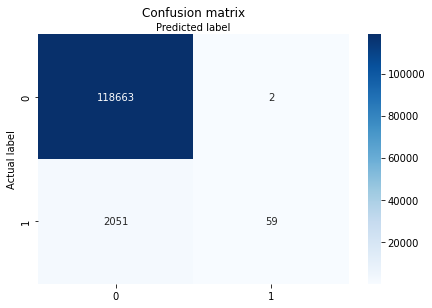

In [134]:
#Visualizing using Confusion Matrix

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [137]:
# Evaluating on Test Set
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.9830014489753675
